In [1]:
import feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your Feather file
feather_file_path = '/allah/freqtrade/user_data/data/binance/futures/ETH_USDT_USDT-3m-futures.feather'

# Read the data from the Feather file into a DataFrame
df_binance_3m = feather.read_dataframe(feather_file_path)
df_binance_3m['date'] = df_binance_3m['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Now, 'df' contains your data as a DataFrame, and you can perform analysis on it.
 

 




In [2]:
df_binance_3m

,date,open,high,low,close,volume
0,2019-11-27 07:45:00,146.00,146.00,146.00,146.00,0.010
1,2019-11-27 07:48:00,146.00,146.00,146.00,146.00,0.000
2,2019-11-27 07:51:00,146.00,146.00,146.00,146.00,0.000
3,2019-11-27 07:54:00,146.00,146.00,146.00,146.00,0.000
4,2019-11-27 07:57:00,146.00,146.00,146.00,146.00,0.000
...,...,...,...,...,...,...
668620,2023-09-20 06:45:00,1634.23,1634.54,1632.38,1633.99,2447.615
668621,2023-09-20 06:48:00,1633.99,1634.19,1631.75,1631.98,2696.649
668622,2023-09-20 06:51:00,1631.97,1633.42,1631.29,1632.79,3398.906
668623,2023-09-20 06:54:00,1632.79,1633.27,1632.72,1633.24,1042.493


In [3]:
import pandas as pd

# Assuming df_combined is your DataFrame
df_analyzed = df_binance_3m.copy()
df_analyzed['date'] = pd.to_datetime(df_analyzed['date']) + pd.DateOffset(hours=8)

filtered_df = df_analyzed[
    df_analyzed['volume'] > (df_analyzed['volume'].rolling(window=6, min_periods=1).sum() - df_analyzed['volume'])
]

# Display the resulting DataFrame (last 100 rows)
filtered_df[-10:]


,date,open,high,low,close,volume
667716,2023-09-18 17:33:00,1634.08,1638.91,1634.08,1637.80,14311.352
667765,2023-09-18 20:00:00,1655.17,1656.75,1652.86,1655.05,27028.155
667774,2023-09-18 20:27:00,1655.00,1665.00,1655.00,1657.56,37776.314
667859,2023-09-19 00:42:00,1653.43,1659.94,1653.38,1656.65,24094.253
667871,2023-09-19 01:18:00,1652.05,1652.65,1646.20,1646.84,27978.017
668283,2023-09-19 21:54:00,1641.06,1641.82,1635.11,1636.88,25691.698
668377,2023-09-20 02:36:00,1646.17,1646.94,1643.20,1644.17,8522.180
668430,2023-09-20 05:15:00,1639.38,1639.78,1637.63,1638.04,5475.019
668495,2023-09-20 08:30:00,1640.34,1640.34,1638.30,1638.51,7867.840
668605,2023-09-20 14:00:00,1633.34,1633.91,1630.50,1631.52,13043.556


8.65


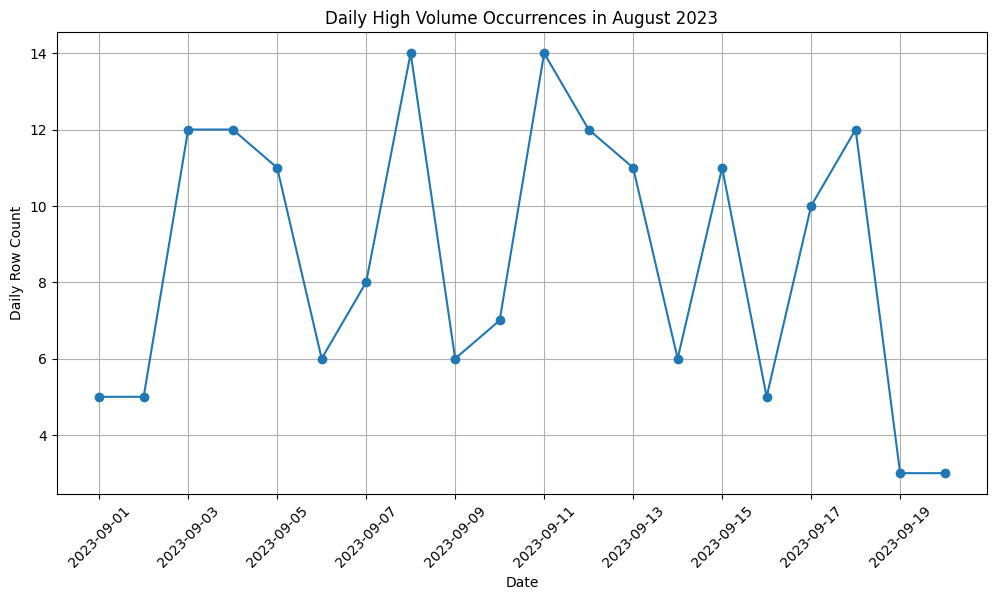

In [13]:
# Filter rows for August 2023
filtered_df_august_2023 = filtered_df[
    (filtered_df['date'].dt.year == 2023) & (filtered_df['date'].dt.month == 9)
]

# Group by date (day) and count the occurrences
daily_occurrences = filtered_df_august_2023.groupby(filtered_df_august_2023['date'].dt.date)['date'].count()
print(daily_occurrences.mean())
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(daily_occurrences.index, daily_occurrences.values, marker='o', linestyle='-')
plt.title('Daily High Volume Occurrences in August 2023')
plt.xlabel('Date')
plt.ylabel('Daily Row Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()